# COMM318 Fall 2021 - _Stories from Data_

## Romantic Relationships in the Modern Age

### Group Members: Joy Ekasi-Otu, Judy Ce Liu, Sofi de la Sierra, Mason Parker

------------


## Research Question

### Main Question

Through this final project, we want to use data to understand parts of this central question:
* What do people look for in a relationship, and how do people behave when seeking/engaging in a relationship?

### Follow-up Questions

We broke this central research question down to three sub-questions:
* 1. What are the specific attributes people value more or less? How do these differ by gender?
* 2. What are the ways in which people interact through cell phones and social media when starting and ending relationships?
* 3. Do people feel like they can create meaningful bonds in their relationships through social media and cell phones?

-----

## Two Data Sources

### The Ideal Partner Dataset

* Our first data source is a survey conducted by a University of Pennsylvania Psychology Professor
    * This dataset had 200+ responses on 20+ questions
    * This survey was designed to determine the respondents’ “Ideal Man / Woman” from hetero-normative perspective
    * Participants were asked to imagine having 500 dollars and were asked to put dollar amounts on attributes based on their valued importances in an ideal partner.
        * The attributes evaluted were:
            * Body attractiveness
            * Face attractiveness
            * Fidelity
            * Intelligence
            * Kindness
            * Sense of Humor
            * Sensitivity
            * Sexual Skill
            * Shared Values
            * Wealth
            
### The Pew Research Dataset
            
* Our second data source is a survey that was collected from Pew Research Center.
    * It collected data from more than 1600 parents and teenagers in 2014 and 2015 and asked a wide variety of questions revolving around technology, social media, dating, and friendships.
    * It also includes demographic information.
    * Raw data link: https://www.pewresearch.org/internet/dataset/september-2014-march-2015-teens/
    
---
* Related information
    * Dataclysm: Love, Sex, Race, and Identity--What Our Online Lives Tell Us about Our Offline Selves
    https://www.amazon.com/Dataclysm-Identity-What-Online-Offline-Selves/dp/0385347391
    * Sex Differences in Mate Preferences Revisited: Do People Know What They Initially Desire in a Romantic Partner https://www.researchgate.net/publication/5640931_Sex_Differences_in_Mate_Preferences_Revisited_Do_People_Know_What_They_Initially_Desire_in_a_Romantic_Partner

# 1. What are the specific attributes people value more or less? How do these differ by gender?

## The Ideal Partner Dataset

### Background on the Ideal Partner dataset
* There has always been academic research done on the preferences individuals exhibit when choosing a romantic partner. One study conducted by Eastwick and Finkel in 2008 examines sex differences when exhibiting mating preferences. The study is linked as follows:
    * Sex Differences in Mate Preferences Revisited: Do People Know What They Initially Desire in a Romantic Partner https://www.researchgate.net/publication/5640931_Sex_Differences_in_Mate_Preferences_Revisited_Do_People_Know_What_They_Initially_Desire_in_a_Romantic_Partner
    * This study uses speed dating and longitudinal follow-ups to assess the validity of the traditional dating paradigm that, 
        
        ##### "Men value physical attractiveness more than women do, and women value earning prospects more than men do."
        #####    
    * The findings of this study support the validity of traditional dating paradigms where traditional sex differences prevail. However, only participants' initial indicated preferences were supported by the study - their behavior in "real-life" situations such as speed-dating events did not match up to their indicated preferences, demonstrating that there is usual cognitive dissonance in people's mating behavior.
    
* Using the Ideal Partner dataset, we wish to see if the results could replicate the results stated in traditional dating paradigms and the above dataset, where sex differences determine what individuals seek in relationships.

### Data Analysis of the Ideal Partner dataset

In [1]:
import pandas as pd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy.stats as stats
import statsmodels.stats as smstats
import statsmodels.formula.api as smf
from statsmodels.multivariate import factor as smfactor
import scipy.cluster.hierarchy as shc
warnings.filterwarnings('ignore')




idealpartner_data = pd.read_csv('../data/Clean Data/Judy_PSYC_dataset_clean.csv')

Within the dataset, all of the variables are assigned importances in the form of $ amount values from 0 to 100. 0 being unimportant and 100 being extremely important.
* Body - importance of body attractiveness in selecting partner (scale 0-100)
* Face - importance of face attractiveness in selecting partner (scale 0-100)
* Fidelity - importance of loyalty in selecting partner (scale 0-100)
* Intelligence - importance of intelligence in selecting partner (scale 0-100)
* Kindness - importance of kindness in selecting partner (scale 0-100)
* Sense of humor - importance of sense of humor in selecting partner (scale 0-100)
* Sensitivity - importance of sensitivity in selecting partner (scale 0-100)
* Sexualskill - importance of sexual skill in selecting partner (scale 0-100)
* Sharedvalues - importance of shared values in selecting partner (scale 0-100)
* Wealth - importance of wealth in selecting partner (scale 0-100)

We conducted an exploratory factor analysis on the ten attributes as follows:

In [2]:
trait_df = idealpartner_data.iloc[:,:10]
fmodel=smfactor.Factor(endog=trait_df, n_factor=3)
factor_res=fmodel.fit()
factor_res.summary()
factor_res.get_loadings_frame()

,factor 0,factor 1,factor 2
Body,0.820822,-0.272826,-0.237359
Face,0.782159,-0.233119,-0.095849
Sexualskill,0.521158,-0.013042,0.267577
Sensitivity,-0.519511,0.016556,-0.409068
Kindness,-0.519304,-0.147179,-0.163868
Sharedvalues,-0.399706,0.008563,0.034185
Intelligence,-0.353389,0.064436,0.282726
Fidelity,-0.200471,-0.103515,-0.172779
Wealth,0.277641,1.267026,-0.110048
Senseofhumor,-0.174112,0.006273,0.331804


We arrive to three factors for analysis:
* Factor 1: positively weighted for physical attributes vs personality characteristics

* Factor 2: wealth

* Factor 3: sense of humor

In [3]:
factor_score_df= pd.DataFrame(factor_res.factor_scoring(), 
                              columns=['F1_Physical', 
                                       'F2_Wealth',
                                       'F3_Humor'])
idealpartner_data2=pd.concat(
    [idealpartner_data, factor_score_df], axis=1)
female_filter = idealpartner_data2['Sex']=='female'
data_female=idealpartner_data2[female_filter]
data_male=idealpartner_data2[-female_filter]

#### Analyzing Factor 1, Physical Attractiveness

<AxesSubplot:xlabel='Sex', ylabel='F1_Physical'>

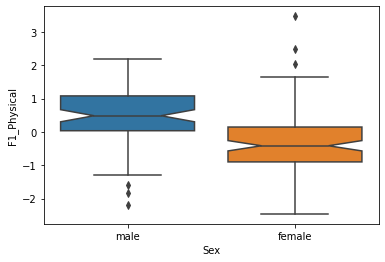

In [4]:
sns.boxplot(x='Sex', y='F1_Physical', data=idealpartner_data2, notch=True)

In [5]:
stats.ttest_ind(a=data_female["F1_Physical"], b=data_male["F1_Physical"], equal_var=False)

Ttest_indResult(statistic=-6.225742313557249, pvalue=3.216161516180481e-09)

##### Results indicate that men and women have a statistically significant difference in the indication of physical attractiveness they wish their ideal partner to have, with men valuing this attribute more than women - supporting the traditional dating paradigm.
* The traditional dating paradigm states that men value physical attractiveness more than women do. As seen here, there is a statistically significant difference between men and women on their indicated importance of physical attractiveness in their partner. 
* The analysis of this survey question supports the Eastwick and Finkel study and traditional dating paradigms.

#### Analyzing Factor 2, Wealth

<AxesSubplot:xlabel='Sex', ylabel='F2_Wealth'>

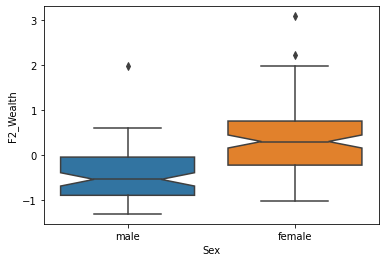

In [6]:
sns.boxplot(x='Sex', y='F2_Wealth', data=idealpartner_data2, notch=True)

In [7]:
stats.ttest_ind(a=data_female["F2_Wealth"], b=data_male["F2_Wealth"], equal_var=False)

Ttest_indResult(statistic=8.334154350001047, pvalue=1.584986741841205e-14)

##### Results indicate that men and women have a stated difference in the importance of wealth they wish their partner has, supporting the traditional dating paradigm.
* The traditional dating paradigm states that women value earning prospects more than men do. As seen here, there is a statistically significant difference between men and women on their indicated importance of wealth in their partner. 
* The analysis of this survey question supports the Eastwick and Finkel study and traditional dating paradigms.

#### Analyzing Factor 3, Sense of Humor
While the Eastwick and Finkel study does not discuss sense of humor, it would be interesting to see if there is a difference between sexes on this attribute.

<AxesSubplot:xlabel='Sex', ylabel='F3_Humor'>

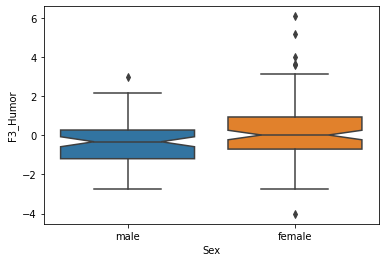

In [8]:
sns.boxplot(x='Sex', y='F3_Humor', data=idealpartner_data2, notch=True)

In [9]:
stats.ttest_ind(a=data_female["F3_Humor"], b=data_male["F3_Humor"], equal_var=False)

Ttest_indResult(statistic=3.4785678104588476, pvalue=0.0006243046409110368)

##### Results indicate that men and women have a stated difference in the importance of humor they wish their partner has, with women valuing sense of humor more than men.
* While this attribute does not have as much of a stark difference as other factors such as physical attractiveness and wealth, it is intriguing to see that women tend to care more about their partner's sense of humor than men.
* One inference we could make from this finding is that, the survey is conducted in a cumulative way (every participant has $500 to allot to each attribute), so that when one attribute is valued less, it means other attributes are valued more. Therefore, women's relative emphasis on sense of humor implies that they care about other attributes such as physical attractiveness less, and men's relative indifference on sense of humor implies that they care about other attributes such as physical attractiveness more.

#### Analyzing another question in the dataset, ideal number of sexual partners
One of the questions asked on the survey was "How many sexual partners ideally would you like to have in your lifetime?"
* We analyzed the distribution of answers to this question by indicated sex as follows:

<AxesSubplot:xlabel='Sex', ylabel='sexpartners'>

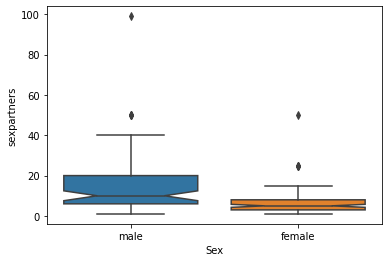

In [10]:
sns.boxplot(x='Sex', y='sexpartners', 
            data=idealpartner_data, notch=True)

In [11]:
stats.ttest_ind(a=data_female["sexpartners"], b=data_male["sexpartners"], equal_var=False)

Ttest_indResult(statistic=-4.888773377798691, pvalue=3.832050122430137e-06)

##### Results indicate that men and women have a stated difference in the amount of sexual partners they wish to have in a lifetime, supporting the traditional dating paradigm.
* While the traditional dating paradigm does not explicitly discuss ideal number of sexual partners as a point of reference for sex differences in mating preferences, we believe that the attribute of "ideal number of sexual partners" aligns with the paradigm's component of men valuing physical attractiveness more than women.
* The analysis of this survey question supports the Eastwick and Finkel study and traditional dating paradigms.

### Our analysis of the Ideal Partner dataset replicates the results found in the Eastwick and Finkel study as well as traditional dating paradigms which state sex differences in mating preferences.
Subsequently, we wanted to look more on the behavior side to answer our second and third research questions on dating in the modern age.

# 2. What are the ways in which people interact through cell phones and social media when starting and ending relationships?

## The Pew Research Dataset


Romantic relationships in the modern age have been heavily influenced by the way technology has been able to play a role in the ways teenagers ask each other out, interact during relationships, and end relationships. Given the different outlets of social media, texting, calling, emailing, etc., there are many options teenagers can choose from regarding the way they interact with one another. Given the data collected in the Pew Research Center survey, we have been able to identify key questions in terms of observing these observations, while additionally analyzing the distinctions between men and women.


### Data Analysis of Pew Research Dataset

In [12]:
import pandas as pd
from IPython.display import HTML, Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cleandating_df = pd.read_csv('../data/Clean Data/Sofi_Clean_Teen_Dating.csv')
joy_df = pd.read_csv('../data/Clean Data/Joy_Clean_Teen_Dating.csv')
cleandating_df['ID'] = joy_df['ID']
merged_df = pd.merge(joy_df,cleandating_df, on='ID')
mason_df = pd.read_csv('../data/Clean Data/Mason_Clean_Teen_Dating.csv')

### Analyzing How Teenagers Start a Relationship

When looking at the survey question, "What is the most appropriate way to ask your significant other out?", the analysis was conducted by creating bar graphs for each sub section of the question. Results indicated that teenagers believe the most appropriate way to ask someone out is in-person.

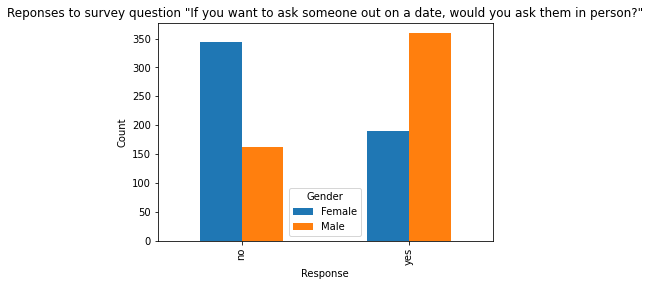

In [56]:
child_gen_grouping = merged_df.groupby('Child_Gen2')
askout_by_gender = child_gen_grouping['askout_inperson'].value_counts().unstack(level=0).round(2)
askout_by_gender.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Response')
plt.title('Reponses to survey question "If you want to ask someone out on a date, would you ask them in person?"')
plt.legend(title = 'Gender');

However, as the bar graph displays, this question was controversial given that a little less than half of the respondents answered that they would not ask their partner out in person. Furthermore, when examining how gender factors into the participants' answers, it is clear that men are way more likely to ask the women out on a date, as they make up the majority of the population that answered the survey question with yes. According to a study conducted in the [Journal of Adolescent Health](https://www.sciencedirect.com/science/article/pii/S1054139X17301489), stereotypical gender norms about romantic relationships prevail across these cultural settings, depicting boys as romantically/sexuallyactive and dominant, and girls as innocent with less (romantic) agency.” Therefore, it makes sense that men are the ones who have more courage to ask out women in person.

The second most appropriate option was to wait for the person to ask you, but the amount of respondents who said yes was significantly lower. Furthermore, as the bar graph displays, males are way less likely to wait for someone to ask them out in comparison to females. According to [Pyschology Today](https://www.psychologytoday.com/us/blog/the-how-and-why-sex-differences/201104/why-dont-women-ask-men-out-first-dates), "men generally have done the asking for a first date, while women have generally given proceptive signals of interest or receptivity to such a request." Given the context provided, and how the results generated below replicate historic gender norms, it makes sense why men are less likely to wait for someone to ask them out.

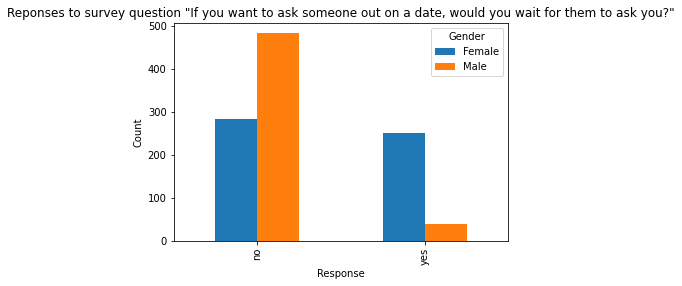

In [58]:
child_gen_grouping = merged_df.groupby('Child_Gen2')
askoutwait_by_gender = child_gen_grouping['askout_wait'].value_counts().unstack(level=0).round(2)
askoutwait_by_gender.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Response')
plt.title('Reponses to survey question "If you want to ask someone out on a date, would you wait for them to ask you?"')
plt.legend(title = 'Gender');

On the other hand, the survey indicated that the options that involved asking someone out through the phone, or through social media, to be the least appropriate. Our interpretation of this is that this is the least interpersonal option, so people find it the least appropriate option as it lacks intimacy.

### Analyzing How Teenagers Act During a Relationship

When looking at the survey question “What is the most common way teens spend time with their significant other?”, the analysis was conducted by plotting bar graphs for each sub section of the question. Results indicated that teenagers talk to their significant other on the phone or through texting everyday. However, it should be noted that texting is the more popular option of the two. In terms of gender, men and female answered relatively the same.

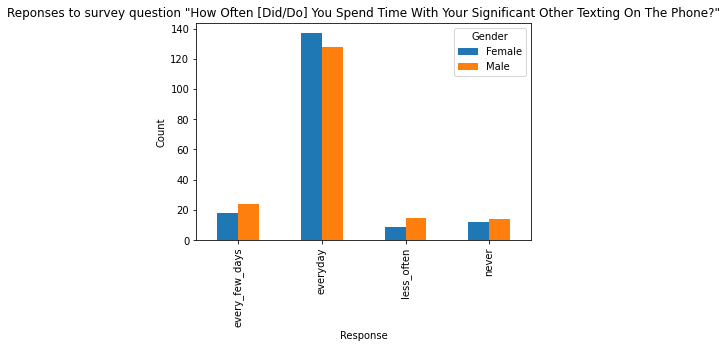

In [65]:
child_gen_grouping = merged_df.groupby('Child_Gen2')
text_by_gender = child_gen_grouping['time_text'].value_counts().unstack(level=0).round(2)
text_by_gender.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Response')
plt.title('Reponses to survey question "How Often [Did/Do] You Spend Time With Your Significant Other Texting On The Phone?"')
plt.legend(title = 'Gender');

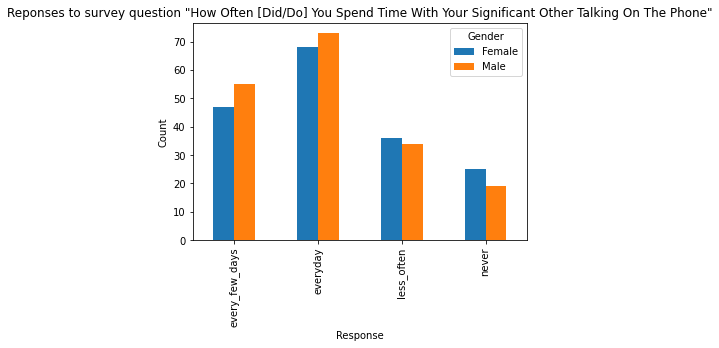

In [66]:
child_gen_grouping = merged_df.groupby('Child_Gen2')
phone_by_gender = child_gen_grouping['time_phone'].value_counts().unstack(level=0).round(2)
phone_by_gender.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Response')
plt.title('Reponses to survey question "How Often [Did/Do] You Spend Time With Your Significant Other Talking On The Phone"')
plt.legend(title = 'Gender');

Furthermore, when referring to how much time people spend with their significant other outside of school, the majority chose the answers "every few days" or “less often." Our interpretation of this is that teenagers may not be able to spend much of their time together outside of school as they may be busy with their extracurriculars, or spending time with their friends and family. Therefore, this would make sense as to why teenagers spend time everyday talking to their significant other over the phone or through texting, as this is the second best option when you cannot be with someone in-person.

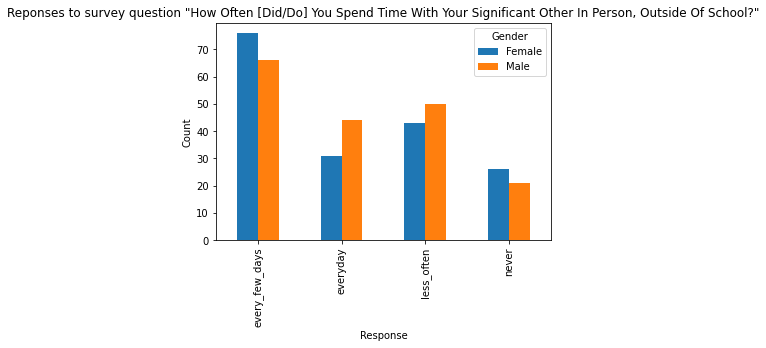

In [67]:
child_gen_grouping = merged_df.groupby('Child_Gen2')
outside_by_gender = child_gen_grouping['time_outsideschoool'].value_counts().unstack(level=0).round(2)
outside_by_gender.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Response')
plt.title('Reponses to survey question "How Often [Did/Do] You Spend Time With Your Significant Other In Person, Outside Of School?"')
plt.legend(title = 'Gender');

Additionally, it was surprising to see that most teenagers answered the question "How Often [Did/Do] You Spend Time With Your Significant Other Through Video Chat?", with the most responses being "never", and the least responses being "everyday." In terms of gender, men and female answered relatively the same. The results were shocking given that videochat is a great substitute to spending time with someone, as you can see their face and have a live conversation with this. However, our interpretation as to why this option is not more popular is that people do not have the time to facetime, or have personal reasons as to why they are interested in it.


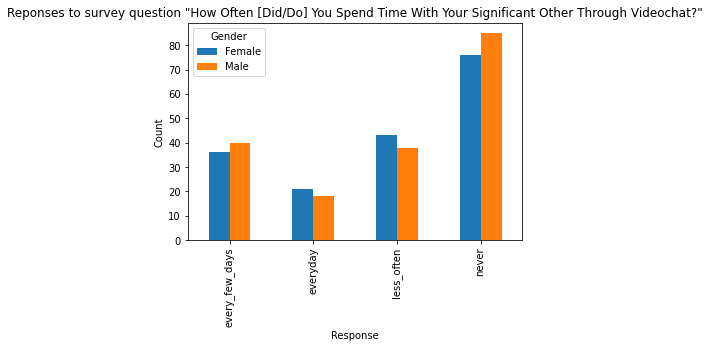

In [68]:
child_gen_grouping = merged_df.groupby('Child_Gen2')
video_by_gender = child_gen_grouping['time_videochat'].value_counts().unstack(level=0).round(2)
video_by_gender.plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Response')
plt.title('Reponses to survey question "How Often [Did/Do] You Spend Time With Your Significant Other Through Videochat?"')
plt.legend(title = 'Gender');

Overall, it is interesting to note how asking someone out through the phone was the least common option, but this is how couples spend most of their time together. Therefore, this provides a nuanced insight about human behavior. Even though in the modern age people have geared more towards using technology, there are still lines we draw in terms of intimacy and genuine interactions.

##### Limitations

One crucial factor to point out is that the survey size was different for each question, given that people often refused to answer the question, or opted out of answering it. Therefore, the answers are not completely accurate, but they provide a general idea of how the majority of teenagers act in regards to relationships.

### Analyzing How Teenagers End a Relationship

# MASON'S PART

# Analyzing Teenagers' Ability to Form Meaningful Bonds Through Social Media and Texting

It is clear that texting and social media has a relatively important role in teenagers' lives, especially as it relates to creating romantic relationships. That being said, it is important to understand the manners in which social medai and other mediums such as texting impact whether or not teenagers are able to form meaningful bonds with their partners or significant others. In particular, such an analysis yields a few interesting conclusions, and makes clear that there is both a difference between how adolescents view social media and texting in terms of their relationships, while simultaneously revealing a dichtomy between personal vs. impersonal interpretations of these mediums.

It is first important to understand whether or not people believe that, in general, they are able to form strong bonds with their partners through virtual means. 

In [22]:
mason_df ['sm_feel_connected'].value_counts(dropna=True)
mappingpknowledge_cnct = {'1':'a lot', '2':'a little', '3':'no', '4': 'DNA', '5': 'refused', '0':None, 'NaN': None, '':None, '-1':None}
mason_df['sm_feel_connected'] = mason_df['sm_feel_connected'].map(mappingpknowledge_cnct)

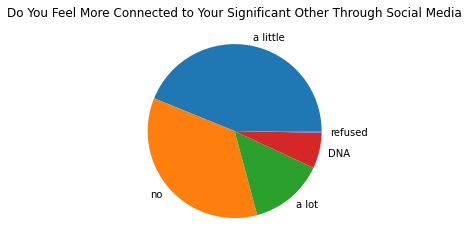

In [23]:
mason_df['sm_feel_connected'].replace(' ', np.nan, inplace=True)
connected_rf = mason_df['sm_feel_connected'].isna()
mason_df[-connected_rf]['sm_feel_connected'].value_counts().plot(kind='pie')
plt.title('Do You Feel More Connected to Your Significant Other Through Social Media')
plt.ylabel('')
plt.xlabel('');

With this in mind, it can be understood that the impact of social media on making partners more connected is minimal, with the overwhelming majority of respondents claiming that they either only felt "a little" more connected with their partner through social media or that they did not feel any more connected whatsoever. Being connected, however, does not have a particularly strong correlation with whether or not adolescents actually feel closer with one another. In other words, social media might be a vehicle through which people can connect, but not a medium by which they can grow closer, as can be seen below.

In [24]:
mason_df ['sm_feel_closer'].value_counts(dropna=True)
mappingpknowledge_closer = {'1':'a lot', '2':'a little', '3':'no', '4': 'DNA', '59': 'refused', '0':None, 'NaN': None, '71':None, '22':None}
mason_df['sm_feel_closer'] = mason_df['sm_feel_closer'].map(mappingpknowledge_closer)

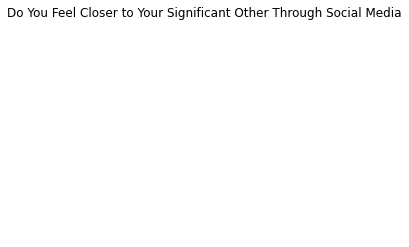

In [25]:
mason_df['sm_feel_closer'].replace(' ', np.nan, inplace=True)
closer_rf = mason_df['sm_feel_closer'].isna()
mason_df[-closer_rf]['sm_feel_closer'].value_counts().plot(kind='pie')
plt.title('Do You Feel Closer to Your Significant Other Through Social Media')
plt.ylabel('')
plt.xlabel('');

As can be observed, social media's ability to connect people does not inherently manifest this connection as meaningful, and in many cases adolescents feel no closer with significant others as a result of social media, implying that the aforementioned "connection" is a superficial, relatively hollow association. And yet, this is not the case when the respondents were asked similar questions regarding texting as it relates to how meaningful their relationship was, indicating a notable difference between social media and more personal communication mediums like texting. 

In [26]:
mappingpknowledge_yesno = {'1':'yes', '2':'no', '3':'refused', '4': 'strongly disagree', '59': 'refused', '0':None, 'NaN': None, '71':None, '22':None}
mason_df['closer_text'] = mason_df['closer_text'].map(mappingpknowledge_yesno)

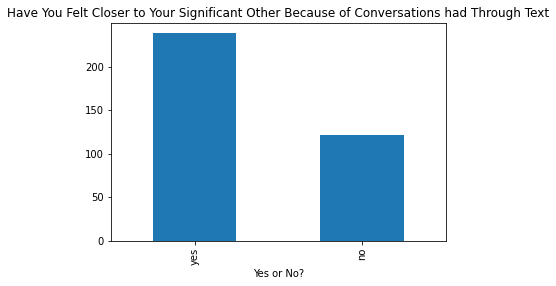

In [27]:
mason_df['closer_text'].replace(' ', np.nan, inplace=True)
closer_text_rf = mason_df['closer_text'].isna()
mason_df[-closer_text_rf]['closer_text'].value_counts().plot(kind='bar')
plt.title('Have You Felt Closer to Your Significant Other Because of Conversations had Through Text')
plt.xlabel('Yes or No?');

Nearly twice as many respondents indicated that they felt closer to their partner as a direct result of texting, which, when juxtaposed with how close people believed they were due to social media, makes clear that many view texting as a more meaningful mode of communication. Though social media might have the potential to connect adolescents with others, the sincerity of those questions simply do not compare with those from texting or direct lines of communication.

However, this theme is not nearly as well observed when discussing more difficult aspects of relationships, such as the resolution of arguments.

In [28]:
mason_df['argument_resolve_text'] = mason_df['argument_resolve_text'].map(mappingpknowledge_yesno)

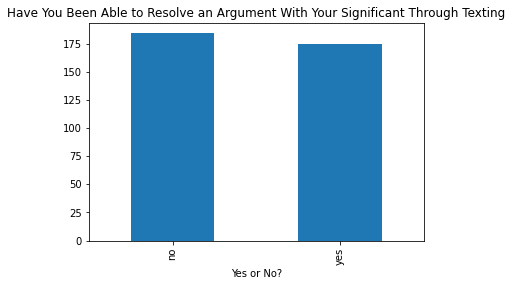

In [29]:
mason_df['argument_resolve_text'].replace(' ', np.nan, inplace=True)
argument_rf = mason_df['argument_resolve_text'].isna()
mason_df[-argument_rf]['argument_resolve_text'].value_counts().plot(kind='bar')
plt.title('Have You Been Able to Resolve an Argument With Your Significant Through Texting')
plt.xlabel('Yes or No?');

Thus, though people believe that they are brought closer together as a result of texting, they concurrently are under the impression that they are unable to come to amicable solutions to arguments through the medium, suggesting a slight dichotmoy in which adolescents appear relatively unclear as to how strong their relationships are via text. It is important to note, however, that the number of youths who answered they had not been able to resolve arguments through texting was only slightly larger than those who indicated that they were able to solve these types of disagreements. As such, it would be difficult to discount the evidence that texting, in general, is a more interpersonal technology that can form stronger bonds between those involved in a romantic relationship.

And yet, this dichotomy is not isolated. There is clear evidence that adolescents exhibit contrasting beliefs when discussing personal and impersonal experiences through social media and texting. One such example of one of these dichotomies is in reference to how often teenagers expect their partner to communicate with them vs. how much they believe their significant other expects reciprocal correspondence.

In [30]:
mappingpknowledge_freq = {'1':'hourly', '2':'every few hours', '3':'daily', '4': 'a few times per week', '5': 'weekly', '6': 'less_often', '0':None, 'NaN': None, '':None, '-1':None}

In [31]:
mason_df['hear_frequency'] = mason_df['hear_frequency'].map(mappingpknowledge_freq)

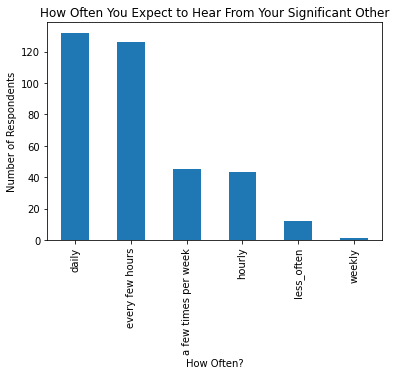

In [32]:
mason_df['hear_frequency'].replace(' ', np.nan, inplace=True)
frequency_rf = mason_df['hear_frequency'].isna()
mason_df[-frequency_rf]['hear_frequency'].value_counts().plot(kind='bar')
plt.title('How Often You Expect to Hear From Your Significant Other')
plt.ylabel('Number of Respondents')
plt.xlabel('How Often?');

Most often, people expect to hear from their significant other daily, although there is a significant portion of respondents who believe that the frequency should be every few hours. Though this seems logical, and it would follow that adolescents have the same expectations with respect to how often they believe their significant other expects to hear from them, this is not the case: rather, the most popular two responses are inverted.

In [33]:
mason_df['hear_from_you_frequency'] = mason_df['hear_from_you_frequency'].map(mappingpknowledge_freq)

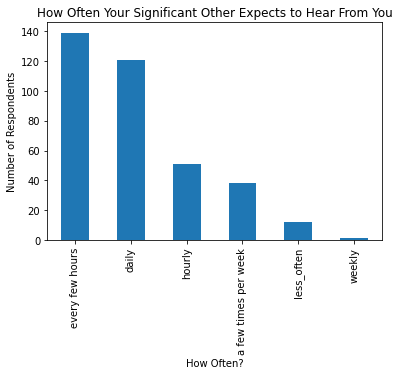

In [34]:
mason_df['hear_from_you_frequency'].replace(' ', np.nan, inplace=True)
frequency_rf = mason_df['hear_from_you_frequency'].isna()
mason_df[-frequency_rf]['hear_from_you_frequency'].value_counts().plot(kind='bar')
plt.title('How Often Your Significant Other Expects to Hear From You')
plt.ylabel('Number of Respondents')
plt.xlabel('How Often?');

The change is not massive, but it is without question that people believe there to be an increased pressure on themselves to communicate more frequently than they expect partners to communicate with them. The reason for this dichotomy is difficult to determine, as there are many potential outside factors that could influence such beliefs. Even so, being under the impression that more is expected of oneself than they expect of others can be the root that leads to a host of different types of unhealthy thinking, and it is not difficult to imagine how this might result in unsubstantiated resentment towards one's partner.

Another dichotomy that must be examined relates to the aforementioned benefits and detriments to the involvement of social media in relationships.